# loading libararies and Data sets

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv(r'cleanedData/train.csv')

In [3]:
df.head()


,Age,Enrollment Type Categorized,Enrollment Months,HCC Score,Avg. LOS,Diagnosis,# Total Claims,# Hospital OP,# All Physician OP,# Inpatient,...,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous,Y,Race_encoded,Sex_encoded,State_encoded
0,1,10,12.0,1,19.0,67,7,5,7,0.0,...,0,0,0.0,7,3,0,0,6,1,9
1,0,20,12.0,1,0.0,32,7,1,7,0.0,...,0,0,0.0,7,0,0,1,1,1,9
2,0,20,12.0,0,0.0,15,7,3,3,0.0,...,0,0,0.0,7,0,0,1,6,1,9
3,0,20,12.0,0,0.0,11,7,3,3,0.0,...,0,0,0.0,7,0,0,1,6,1,9
4,1,10,12.0,0,0.0,14,7,3,3,0.0,...,0,0,0.0,7,0,0,1,1,0,9


In [4]:
df.corr()

,Age,Enrollment Type Categorized,Enrollment Months,HCC Score,Avg. LOS,Diagnosis,# Total Claims,# Hospital OP,# All Physician OP,# Inpatient,...,# Part B Ambulance,# Dialysis,# Part-B Dialysis,# Rx Claims,# DME,# Miscellaneous,Y,Race_encoded,Sex_encoded,State_encoded
Age,1.000000,-0.960666,0.032914,-0.024818,-0.004189,-0.007442,0.000736,0.004805,0.007310,-0.001200,...,-0.027120,-0.049531,-0.049340,-0.028336,-0.053096,0.002184,-0.000786,0.108191,-0.042250,0.021451
Enrollment Type Categorized,-0.960666,1.000000,-0.035246,0.029233,0.014528,0.016679,-0.002821,0.003445,-0.004841,0.005673,...,0.039059,0.091456,0.090609,0.028742,0.058517,-0.002022,-0.009358,-0.110069,0.042993,-0.021347
Enrollment Months,0.032914,-0.035246,1.000000,0.060986,0.023282,0.092271,0.254715,0.102405,0.162738,0.018459,...,0.019975,0.011009,0.011141,0.163956,0.082006,0.004630,-0.018733,-0.000926,-0.012389,0.006362
HCC Score,-0.024818,0.029233,0.060986,1.000000,0.150733,0.334242,0.045899,0.218637,0.257411,0.107921,...,0.094895,0.002745,0.000704,0.089503,0.209438,0.026263,-0.202908,0.024541,0.011382,0.003684
Avg. LOS,-0.004189,0.014528,0.023282,0.150733,1.000000,0.350202,0.017903,0.114264,0.151032,0.331907,...,0.256124,0.063305,0.071476,0.042904,0.127474,0.067162,-0.155557,-0.023640,-0.045117,-0.018313
Diagnosis,-0.007442,0.016679,0.092271,0.334242,0.350202,1.000000,0.080517,0.539655,0.594898,0.516559,...,0.324018,0.095383,0.099041,0.135074,0.287841,0.101377,-0.301060,0.043397,-0.081179,-0.008505
# Total Claims,0.000736,-0.002821,0.254715,0.045899,0.017903,0.080517,1.000000,0.091546,0.166374,0.021618,...,0.015955,0.005578,0.005652,0.405445,0.058337,0.004630,-0.027174,0.003777,-0.036641,0.008724
# Hospital OP,0.004805,0.003445,0.102405,0.218637,0.114264,0.539655,0.091546,1.000000,0.442133,0.179153,...,0.094815,0.123028,0.123450,0.115968,0.196534,0.051237,-0.197057,0.027209,-0.072686,-0.014850
# All Physician OP,0.007310,-0.004841,0.162738,0.257411,0.151032,0.594898,0.166374,0.442133,1.000000,0.218528,...,0.144876,0.058607,0.058800,0.165272,0.213424,0.038821,-0.188862,0.039825,-0.062856,0.007447
# Inpatient,-0.001200,0.005673,0.018459,0.107921,0.331907,0.516559,0.021618,0.179153,0.218528,1.000000,...,0.343694,0.047312,0.053352,0.042433,0.100271,0.121928,-0.134956,0.008369,-0.008013,-0.026315


<Axes: >

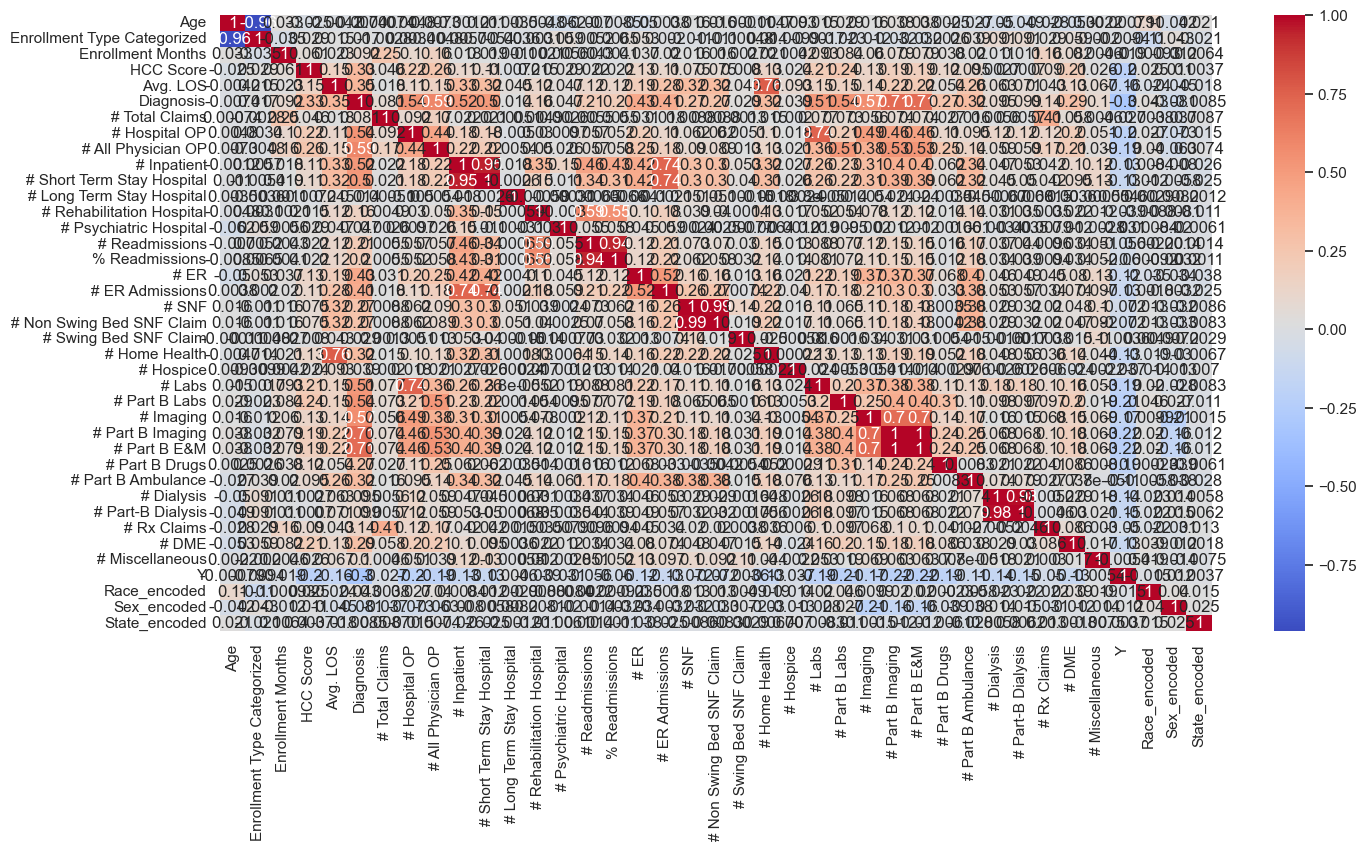

In [5]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# looking at the results we can drop these features

In [6]:
dropped_features = ["Enrollment Type Categorized","# Part-B Dialysis","# Part B Imaging","% Readmissions","# Non Swing Bed SNF Claim","# Short Term Stay Hospital"]

# We have to drop these features in our saved data sets too REMOVE OUTLIER ROWS 

In [7]:
df_train = pd.read_csv(r'cleanedData/train.csv')
df_test = pd.read_csv(r'cleanedData/test.csv')
df_train = df_train.drop(dropped_features,axis=1)
df_train[(np.abs(stats.zscore(df_train)) < 3).all(axis=1)]
df_test = df_test.drop(dropped_features,axis=1)
df_train.to_csv(r'cleanedData/train_new.csv',index=False)
df_test.to_csv(r'cleanedData/test_new.csv',index=False)